In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bdmtest/Test.xlsx
/kaggle/input/bdmcom/Train.xlsx


In [177]:
import pandas as pd
import numpy as np

#pre_processing
#
#
#
#
#
df = pd.read_excel('../input/bdmcom/Train.xlsx')
df.head()
df = df.drop('NO',axis=1)

classified = np.unique(df['CLASS'])
classValue = [sum(df['CLASS']==classified[0]),
             sum(df['CLASS']==classified[1]),
             sum(df['CLASS']==classified[2])]

y = df['CLASS'].values
X = df.drop(['CLASS'],axis = 1).values

X = np.nan_to_num(X)



from imblearn.over_sampling import SMOTE
######
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
######

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
######

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(chi2, k=60)
fs.fit(X_train, y_train)
X_test = fs.transform(X_test)
X_train = fs.transform(X_train)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [178]:
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [500],
    'max_depth' : [8],
    'learning_rate' : [0.1],
    'subsample' : [0.5],
    'colsample_bytree' : [0.8]    
}

start=datetime.now()
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))
runtime = datetime.now()-start
print('best param search: '+ str(runtime))

Best params : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}
10CV accuracy : 83.26354679802955
best param search: 0:00:09.249268


In [179]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 80.16528925619835


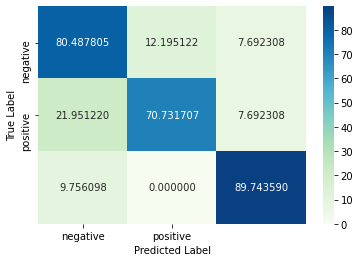

In [180]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [181]:
import pandas as pd
import numpy as np

#pre_processing
#
#
#
#
#
df = pd.read_excel('../input/bdmtest/Test.xlsx')
df.head()
df = df.drop('NO',axis=1)

classified = np.unique(df['CLASS'])
classValue = [sum(df['CLASS']==classified[0]),
             sum(df['CLASS']==classified[1]),
             sum(df['CLASS']==classified[2])]

y_test2 = df['CLASS'].values
X_test2 = df.drop(['CLASS'],axis = 1).values

X_test2 = np.nan_to_num(X_test2)

In [182]:
X_test2

array([[3, 4, 2, ..., 1, 3, 5],
       [1, 5, 1, ..., 2, 1, 5],
       [1, 4, 2, ..., 1, 2, 4],
       ...,
       [3, 4, 2, ..., 3, 4, 3],
       [4, 3, 3, ..., 4, 4, 4],
       [4, 4, 2, ..., 3, 4, 3]])

In [183]:
X_test = fs.transform(X_test2)

In [184]:
X_test_norm = scaler.transform(X_test)

In [185]:
y_test2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [186]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test2 == y_predict)/len(y_test2)*100))

Test accuracy : 56.666666666666664
